## LinearRegression() and Regulization model with Lasso(),Ridge(),ElasticNet()

1. Basic EDA and Feature Selection techniques are used.
2. Pandas Profilling used to understand relationship for features with label 


## About Dataset
1. dataset is about getting chance of admision into university based on students GPA,Toffel score,
   university rating, reserch work is done or not , CGPA , SOP and LOR(letter of recomodation)

## Importing library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from pandas_profiling import ProfileReport
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("Admission_Prediction.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


#### Understanding dataset or each features
1. Here regression probelm because contineous output where chance of addmision is given for students
2. Each features can be understand from its columns name where serial number is not usefull for us

In [4]:
#### Pandas Profie report
report = ProfileReport(df)

In [5]:
report.to_widgets()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

#### Profile Report 
1. Serial number and reserch are catogerical feature
2. there are many null values present in dataset
3. missing values are present in GRE and Tofel scaore


#### Why linear regression used
1. check relationship with feature and label where generalized relationship is linearity 
2. than check relationship among features
3. afterward checking pearson relationship where multicolinearity can be observed but it is not more    than 90% which means acceptable. Moreover it can be varified using VIF values

## Replacing Null values with mean value of particular featues
1. There are many ways to replace null values but here used most common one


In [6]:
#GER SCORE
df["GRE Score"] = df["GRE Score"].fillna(df["GRE Score"].mean())

In [7]:
df["TOEFL Score"] = df["TOEFL Score"].fillna(df["TOEFL Score"].mean())

In [8]:
df["University Rating"] = df["University Rating"].fillna(df["University Rating"].mean())

In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128802,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Removing unneccessory columns form dataset

In [10]:
df.drop("Serial No." , inplace=True , axis = 1)

In [11]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


## Defining Feature and label

In [12]:
x = df.drop("Chance of Admit" , axis = 1)
y = df["Chance of Admit"]


## Standerdize Dataset using StandardScaler()

In [13]:
st_sc = StandardScaler()

In [14]:
ary = st_sc.fit_transform(x)

In [15]:
ary

array([[ 1.84274116e+00,  1.78854223e+00,  7.78905651e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.78905651e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.07876604e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66568791e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.78905651e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.78905651e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [16]:
df1 = pd.DataFrame(ary , columns=x.columns)

In [17]:
df1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.842741e+00,1.788542,0.778906,1.137360,1.098944,1.776806,0.886405
1,6.708143e-01,-0.031058,0.778906,0.632315,1.098944,0.485859,0.886405
2,5.124333e-15,-0.527313,-0.107877,-0.377773,0.017306,-0.954043,0.886405
3,4.905178e-01,0.465197,-0.107877,0.127271,-1.064332,0.154847,0.886405
4,-2.306679e-01,-0.692731,-0.994659,-1.387862,-0.523513,-0.606480,-1.128152
...,...,...,...,...,...,...,...
495,1.392000e+00,0.134360,1.665688,1.137360,0.558125,0.734118,0.886405
496,1.842741e+00,1.623124,1.665688,1.642404,1.639763,2.140919,0.886405
497,1.211704e+00,2.119379,1.665688,1.137360,1.639763,1.627851,0.886405
498,-4.109644e-01,-0.692731,0.778906,0.632315,1.639763,-0.242367,-1.128152


In [18]:
df1.describe()   #Controlling range of data by scaller transformation using standerdization 

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,4.350520e-15,9.419132e-16,5.608847e-16,2.926548e-16,-1.332268e-17,3.091971e-15,-2.202682e-16
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-2.394225e+00,-2.512331e+00,-1.881441e+00,-2.397950e+00,-2.686789e+00,-2.940115e+00,-1.128152e+00
25%,-6.814090e-01,-6.927310e-01,-9.946589e-01,-8.828175e-01,-5.235128e-01,-7.430227e-01,-1.128152e+00
50%,5.124333e-15,-3.105811e-02,-1.078766e-01,1.272712e-01,1.730621e-02,-2.720919e-02,8.864053e-01
75%,6.708143e-01,7.960330e-01,7.789057e-01,6.323155e-01,5.581253e-01,7.672196e-01,8.864053e-01
max,2.113186e+00,2.119379e+00,1.665688e+00,1.642404e+00,1.639763e+00,2.223672e+00,8.864053e-01


## Cheking Multicolinearity using Varince Influence Factor

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
VIF = [variance_inflation_factor(ary , i) for i in range(0,ary.shape[1])]  #shape is indicating number of columns which is argument for VIF

In [21]:
VIF

[4.1532675722258245,
 3.792866110594648,
 2.508768242278763,
 2.7757495092534956,
 2.0373076624897517,
 4.651669561154733,
 1.4593106786827286]

In [22]:
VIF_DataFrame = pd.DataFrame( VIF  )

In [23]:
VIF_DataFrame = VIF_DataFrame.rename({0:"VIF"} , axis = 1)

In [24]:
VIF_DataFrame["Feature"] = x.columns

In [25]:
VIF_DataFrame

,VIF,Feature
0,4.153268,GRE Score
1,3.792866,TOEFL Score
2,2.508768,University Rating
3,2.775750,SOP
4,2.037308,LOR
5,4.651670,CGPA
6,1.459311,Research


VIF is not crossing value of 10 for any features which means no need to drop any features

## Splliting dataset for testing and training perpose

In [26]:
#here test size is 10% and random_state is equavalent to seed argument in numpy and fix data which randomly choozen

x_train ,x_test, y_train , y_test = train_test_split(ary , y , test_size = 0.10 ,  random_state = 100 )

In [27]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()

In [28]:
lr1.fit(x_train , y_train)

LinearRegression()

In [29]:
lr1.intercept_

0.7204110140569641

In [30]:
lr1.coef_

array([ 0.01910105,  0.01654831,  0.00508326, -0.00047758,  0.01745071,
        0.07526256,  0.0127209 ])

Above there are negative values near to zero whcih indicating non-performing columns and where p values can be checked

## Saving model with sav file 

In [31]:
pickle.dump(lr1 , open("Admission_Prediction.pickle" , "wb"))

In [32]:
ls

 Volume in drive C is Acer
 Volume Serial Number is F807-28BB

 Directory of C:\DATA SCIENCE STUDY DRIVE\iNeuron DataScience Course\Class Practice Note\DATE CLASS 35_18_09_2021 Linear Regression Practicle

25-09-2021  10:01    <DIR>          .
25-09-2021  10:01    <DIR>          ..
24-09-2021  18:10    <DIR>          .ipynb_checkpoints
24-09-2021  22:08               560 Admission_Prediction
27-12-2019  20:52            16,085 Admission_Prediction.csv
25-09-2021  10:06               560 Admission_Prediction.pickle
27-12-2019  20:52             4,756 Advertising.csv
23-09-2021  17:16             1,394 DATE CLASS 35 Pickle Load for prediction.ipynb
25-09-2021  10:01            62,546 DATE CLASS 35_LinearRegresssion Practical for admision dataset.ipynb
24-09-2021  22:22         2,069,580 DATE CLASS 35_LinearRegresssion Practical for sales dataset.ipynb
24-09-2021  20:51    <DIR>          GIVEN FILE
24-09-2021  17:03               493 lr.sav
               8 File(s)      2,155,974 bytes
  

## Prediction Of Dataset

First of all testing data must be scaled for correct predication values

In [33]:
y_Predict = lr1.predict(x_test)

In [34]:
Result = pd.DataFrame(y_Predict , columns=["y_Predict"])

In [35]:
y_test = y_test.reset_index(drop = True)

In [36]:
Result["Y_actual"] = y_test

In [37]:
Result.head()

,y_Predict,Y_actual
0,0.858620,0.78
1,0.481191,0.54
2,0.634286,0.64
3,0.452133,0.47
4,0.651258,0.70


Text(0, 0.5, 'Actual Chance')

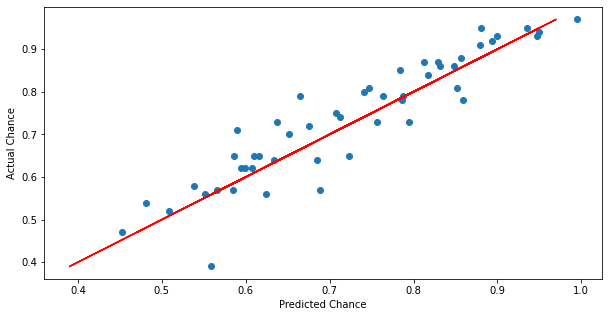

In [38]:
figure = plt.figure(figsize=(10,5))
plt.scatter(Result["y_Predict"],Result["Y_actual"])
plt.plot(Result["Y_actual"],Result["Y_actual"], c = "red")
plt.xlabel("Predicted Chance")
plt.ylabel("Actual Chance")

## Applying Regulation Tequniques

In [41]:
#Calculating value of adjudted r2
def adjusted_R2(lr ,feature , label) :
    n = feature.shape[0]
    p = feature.shape[1]
    r = lr.score(feature , label) 
    return  1 - (1-r)*(n-1)/(n-p-1)

In [42]:
adjusted_R2(lr1,x_test,y_test)

0.8198202264088412

#### Applying lasso techniques

In [53]:
from sklearn.linear_model import Ridge ,RidgeCV, Lasso ,LassoCV, LarsCV , ElasticNet, ElasticNetCV


In [47]:
#### First is defining cross validation or define shrinkage factor
#### cv is cross validation where 49 random selected data is trained and one used for testing
#### it will repeat same process 1000 times as condition is given here max_iter = 1000 and normalized data each time
LassoCV = LassoCV(alphas= None , cv = 50, max_iter = 1000 , normalize=True )

In [48]:
LassoCV.fit(x_train , y_train)

LassoCV(cv=50, normalize=True)

In [49]:
LassoCV.alpha_    #value of shrinkage factor is given as described

2.5304685541530637e-05

In [51]:
##### Fit model to control loss with given alpha values
ls_mo = Lasso(alpha= LassoCV.alpha_)
ls_mo.fit(x_train , y_train)

Lasso(alpha=2.5304685541530637e-05)

In [52]:
ls_mo.score(x_test , y_test)

0.8457056329852928

#### Ridge Regression

In [56]:
#to find ridge model value of alphas required which given with numpy 
ridgecv = RidgeCV(alphas=np.random.uniform(0,10,100) , cv = 10 , normalize=True)

In [57]:
ridgecv.alphas

array([1.341853  , 4.24183525, 5.13580753, 3.80663433, 1.11980187,
       8.12586282, 2.17748973, 0.975071  , 1.23903884, 4.52354726,
       0.91234114, 7.67915121, 4.68895565, 0.24317159, 3.89621257,
       3.10502857, 6.25386086, 0.08407972, 0.58839446, 8.65582673,
       5.87568823, 1.49575965, 3.43433973, 5.64481663, 5.09566882,
       0.85780394, 0.21020016, 2.83437732, 6.13253134, 3.29109383,
       2.08970541, 8.44048272, 9.58434837, 3.85693391, 9.9428517 ,
       0.34269695, 6.41885084, 4.59320246, 3.15263473, 6.39386528,
       5.35150491, 5.72816149, 3.89606719, 5.79637591, 9.82932236,
       1.30847849, 8.70122623, 0.2233546 , 5.66352584, 4.91121514,
       0.24726301, 9.15126209, 9.60429784, 9.37146971, 7.25144518,
       4.62202695, 1.28727056, 4.36204581, 0.24355539, 8.79226462,
       7.91663733, 8.58604497, 6.2307205 , 8.0505424 , 5.95794371,
       4.87865835, 1.07999781, 7.82938965, 7.7809203 , 9.85362813,
       4.53951337, 2.27869421, 5.97779113, 0.4443179 , 9.45705

In [58]:
ridgecv.fit(x_train , y_train)

RidgeCV(alphas=array([1.341853  , 4.24183525, 5.13580753, 3.80663433, 1.11980187,
       8.12586282, 2.17748973, 0.975071  , 1.23903884, 4.52354726,
       0.91234114, 7.67915121, 4.68895565, 0.24317159, 3.89621257,
       3.10502857, 6.25386086, 0.08407972, 0.58839446, 8.65582673,
       5.87568823, 1.49575965, 3.43433973, 5.64481663, 5.09566882,
       0.85780394, 0.21020016, 2.83437732, 6.13253134, 3.29109383,
       2....
       4.53951337, 2.27869421, 5.97779113, 0.4443179 , 9.45705865,
       2.84191026, 0.79276824, 3.16955328, 5.53628448, 6.24235289,
       9.10680007, 3.93999823, 2.00708957, 8.42668536, 9.31002377,
       3.69335835, 4.12827957, 2.59017714, 1.2421814 , 0.43324625,
       8.9978763 , 8.19985352, 6.02395738, 5.46579678, 0.86454683,
       0.94586238, 7.71628145, 4.96586785, 6.25473075, 5.96745677]),
        cv=10, normalize=True)

In [60]:
ridgecv.alpha_

0.08407971778391699

In [61]:
rid = Ridge(alpha=ridgecv.alpha_)
rid.fit(x_train , y_train)

Ridge(alpha=0.08407971778391699)

In [62]:
rid.score(x_test,y_test)

0.8455946877446089

 With lasso and ridge no improvement in accuracy observed

#### Elasticnet  Regression

In [64]:
ElasticNetCV = ElasticNetCV(alphas = None , cv = 10)

In [65]:
ElasticNetCV.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [66]:
ElasticNetCV.alpha_

0.001860632420865413

In [67]:
ElasticNetCV.l1_ratio

0.5

In [68]:
Elastic_lr = ElasticNet(alpha=ElasticNetCV.alpha_ , l1_ratio= ElasticNetCV.l1_ratio)

In [70]:
Elastic_lr.fit(x_train,y_train)

ElasticNet(alpha=0.001860632420865413)

In [71]:
Elastic_lr.score(x_test,y_test)

0.8464012025641322

Again accuracy is not increased. All model are providing same range of accuracy